HEALTH DIBTIES PROJECT


In [5]:
import pandas as pd


In [6]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale , StandardScaler
import warnings
warnings.simplefilter(action='ignore')


In [7]:
from sklearn.model_selection import train_test_split , GridSearchCV , cross_val_score

In [8]:
from sklearn.metrics import confusion_matrix , accuracy_score , mean_squared_error,r2_score,roc_auc_score , roc_curve, classification_report

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import  GradientBoostingClassifier 
from sklearn.model_selection import KFold
plt.style.use("ggplot")
%matplotlib inline

In [11]:
df = pd.read_csv("c:\\Users\\91893\\Desktop\\Pandas\\CSV_FILE\\Healthcare-Diabetes.csv")

# Reading the data

In [12]:
df.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


# Information about data


In [13]:
df.info

<bound method DataFrame.info of         Id  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0        1            6      148             72             35        0  33.6   
1        2            1       85             66             29        0  26.6   
2        3            8      183             64              0        0  23.3   
3        4            1       89             66             23       94  28.1   
4        5            0      137             40             35      168  43.1   
...    ...          ...      ...            ...            ...      ...   ...   
2763  2764            2       75             64             24       55  29.7   
2764  2765            8      179             72             42      130  32.7   
2765  2766            6       85             78              0        0  31.2   
2766  2767            0      129            110             46      130  67.1   
2767  2768            2       81             72             15       76  30.1

# Cheacking null value total


In [14]:
null_sum = df.isnull().sum()

In [15]:
print(null_sum)

Id                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [13]:
df.columns

Index(['Id', 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

# Describe the data 

In [14]:
df.describe()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000
mean,1384.500000,3.742775,121.102601,69.134393,20.824422,80.127890,32.137392,0.471193,33.132225,0.343931
std,799.197097,3.323801,32.036508,19.231438,16.059596,112.301933,8.076127,0.325669,11.777230,0.475104
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,692.750000,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000
50%,1384.500000,3.000000,117.000000,72.000000,23.000000,37.000000,32.200000,0.375000,29.000000,0.000000
75%,2076.250000,6.000000,141.000000,80.000000,32.000000,130.000000,36.625000,0.624000,40.000000,1.000000
max,2768.000000,17.000000,199.000000,122.000000,110.000000,846.000000,80.600000,2.420000,81.000000,1.000000


In [41]:
df.shape

(2768, 10)

In [14]:
Id = 'Id'
df = df.drop(Id  , axis=1)

In [16]:
df.size

24912

In [17]:
df.shape

(2768, 9)

In [16]:
df = df.drop(df.index[768:2769])

In [16]:
df.shape


(768, 9)

In [17]:
df['Outcome'].value_counts()*100/len(df)

Outcome
0    65.104167
1    34.895833
Name: count, dtype: float64

# Ploting histogram

<Axes: xlabel='Age', ylabel='Count'>

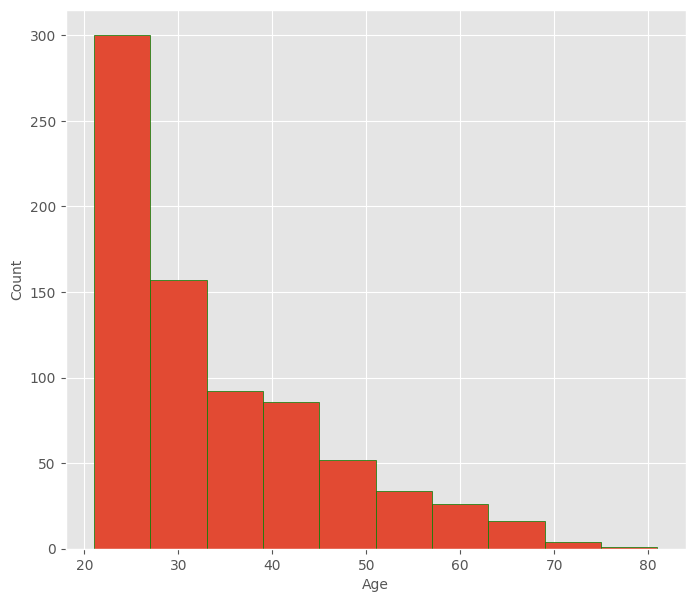

In [18]:
plt.figure(figsize=(8,7))
plt.xlabel('Age' , fontsize = 10)
plt.ylabel('Count' , fontsize = 10)
df['Age'].hist(edgecolor = "green")

In [22]:
df['Age'].max()


81

In [56]:
df['Age'].min()

21

In [58]:
print("Max Age : " + str(df['Age'].max()))
print("Min Age : " + str(df['Age'].min()))

Max Age : 81
Min Age : 21


In [24]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

# Ploting density graph

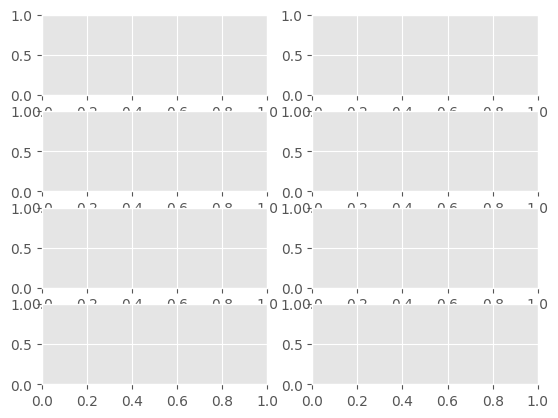

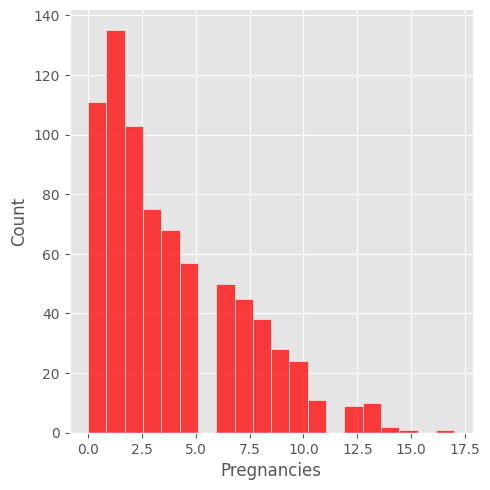

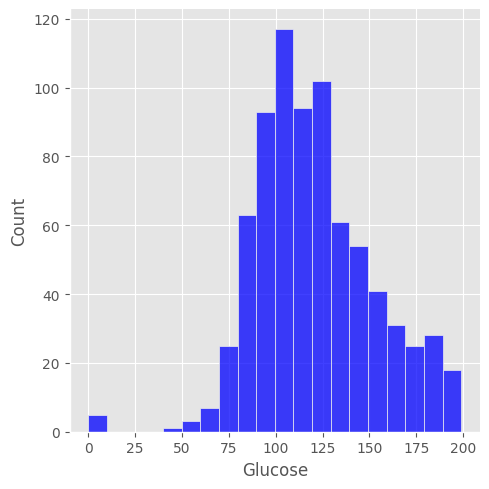

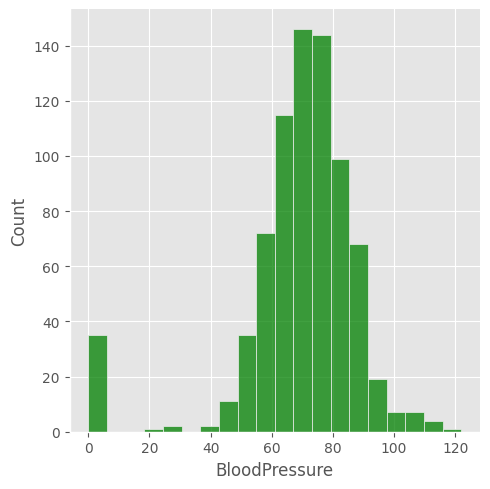

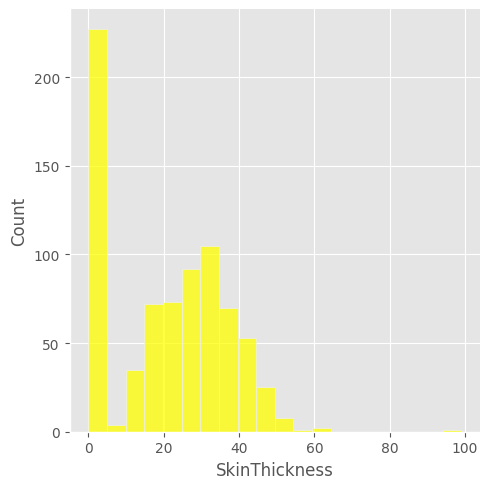

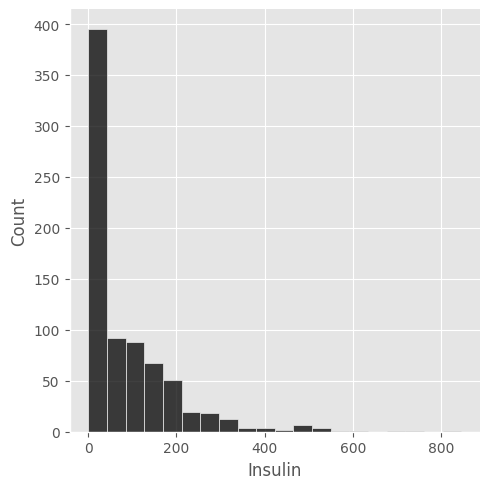

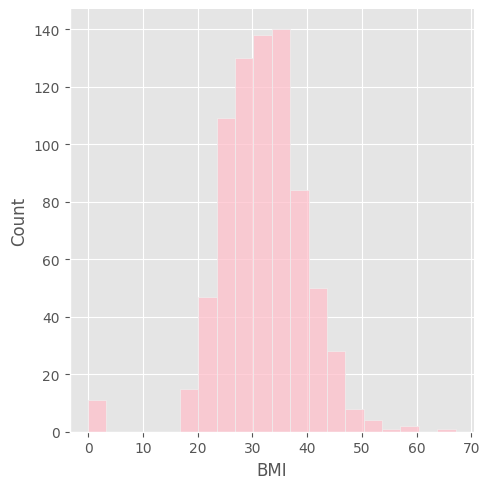

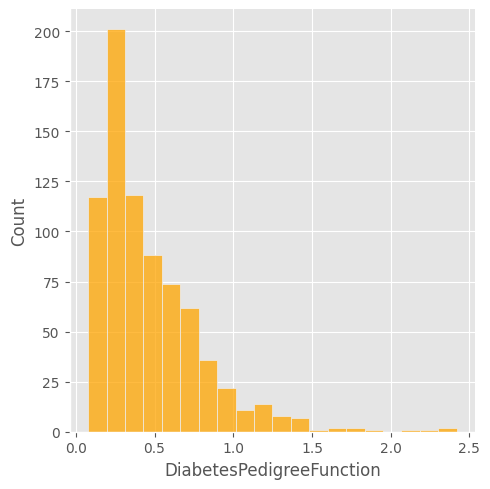

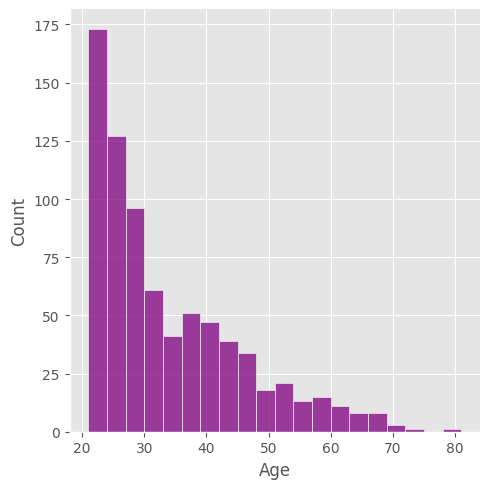

In [19]:
fig, ax = plt.subplots(4, 2)
sns.displot(df.Pregnancies , bins = 20 , ax = ax[0,0] , color="red")
sns.displot(df.Glucose , bins = 20 , ax = ax[0,1] , color="blue")
sns.displot(df.BloodPressure, bins = 20 , ax = ax[1,0] , color="green")
sns.displot(df.SkinThickness , bins = 20 , ax = ax[1,1] , color="yellow")
sns.displot(df.Insulin , bins = 20 , ax = ax[2,0] , color="black")
sns.displot(df.BMI , bins = 20 , ax = ax[2,1] , color="pink")
sns.displot(df.DiabetesPedigreeFunction , bins = 20 , ax = ax[3,0] , color="orange")
sns.displot(df.Age , bins = 20 , ax = ax[3,1] , color="purple")


# Cheacking min and max value

In [20]:
df.groupby("Outcome").agg({'Pregnancies':'mean'})

,Pregnancies
Outcome,
0,3.298000
1,4.865672


In [35]:
df.groupby("Outcome").agg({'Pregnancies':'max'})

,Pregnancies
Outcome,
0,13
1,17


In [21]:
df.groupby("Outcome").agg({'Glucose':'mean'})

,Glucose
Outcome,
0,109.980000
1,141.257463


In [22]:
df.groupby("Outcome").agg({'Glucose':'max'})

,Glucose
Outcome,
0,197
1,199


In [23]:
df.groupby("Outcome").agg({'BloodPressure':'mean'})

,BloodPressure
Outcome,
0,68.184000
1,70.824627


In [40]:
df.groupby("Outcome").agg({'BloodPressure':'max'})

,BloodPressure
Outcome,
0,122
1,114


In [24]:
df.groupby("Outcome").agg({'SkinThickness':'mean'})

,SkinThickness
Outcome,
0,19.664000
1,22.164179


In [42]:
df.groupby("Outcome").agg({'SkinThickness':'max'})

,SkinThickness
Outcome,
0,60
1,99


In [25]:
df.groupby("Outcome").agg({'Insulin':'mean'})

,Insulin
Outcome,
0,68.792000
1,100.335821


In [26]:
df.groupby("Outcome").agg({'Insulin':'max'})

,Insulin
Outcome,
0,744
1,846


In [45]:
df.groupby("Outcome").agg({'BMI':'mean'})

,BMI
Outcome,
0,30.304200
1,35.142537


In [46]:
df.groupby("Outcome").agg({'BMI':'max'})

,BMI
Outcome,
0,57.3
1,67.1


In [47]:
df.groupby("Outcome").agg({'DiabetesPedigreeFunction':'mean'})

,DiabetesPedigreeFunction
Outcome,
0,0.429734
1,0.550500


In [48]:
df.groupby("Outcome").agg({'DiabetesPedigreeFunction':'max'})

,DiabetesPedigreeFunction
Outcome,
0,2.329
1,2.420


In [36]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

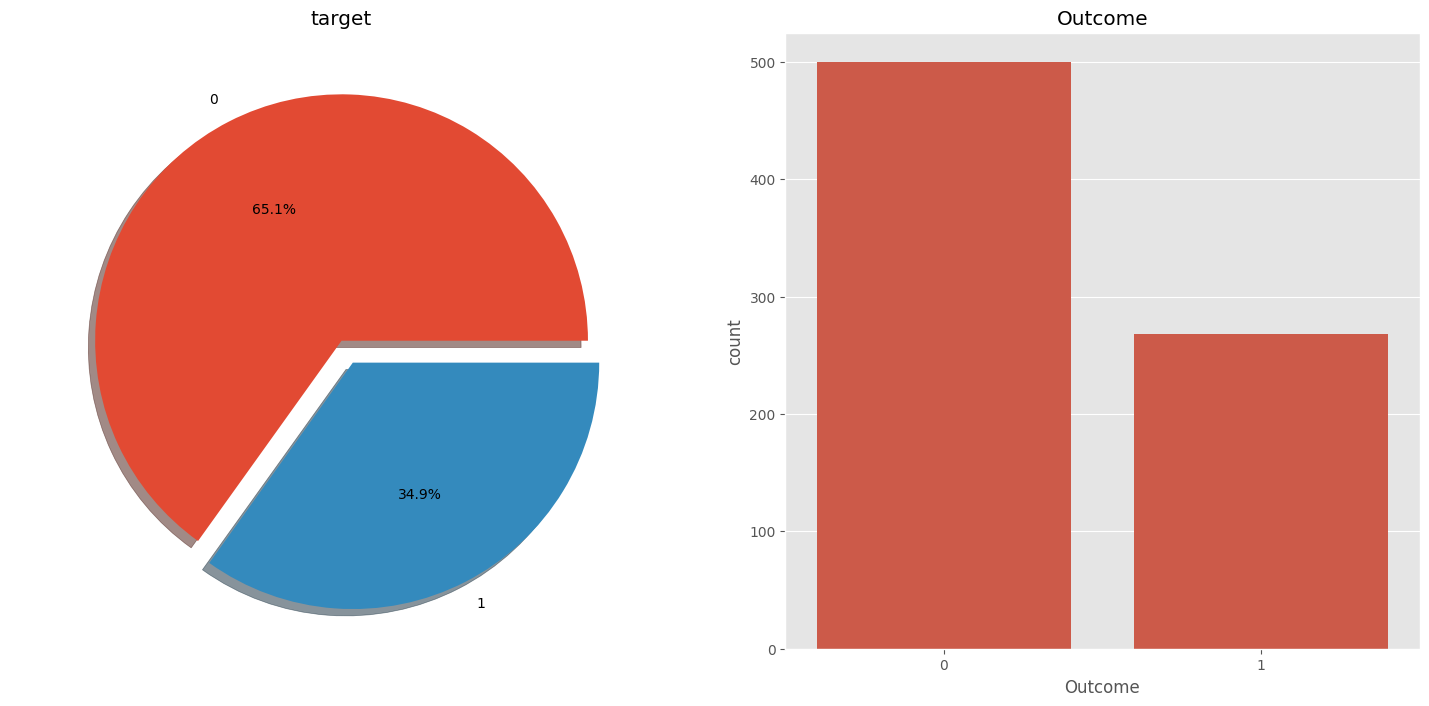

In [27]:
f , ax = plt.subplots(1,2 , figsize=(18,8))
df['Outcome'].value_counts().plot.pie(explode=[0,0.1],autopct="%1.1f%%" , ax = ax[0] , shadow = True)
ax[0].set_title('target')
ax[0].set_ylabel(' ')
sns.countplot(x = 'Outcome' , data=df , ax=ax[1] )
ax[1].set_title('Outcome')
plt.show()

In [28]:
df.corr()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Id,1.000000,-0.037201,0.012994,0.020953,0.019006,0.001998,0.012320,-0.040326,0.007714,-0.045184
Pregnancies,-0.037201,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.012994,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.020953,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,0.019006,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,0.001998,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.012320,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.040326,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.007714,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,-0.045184,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


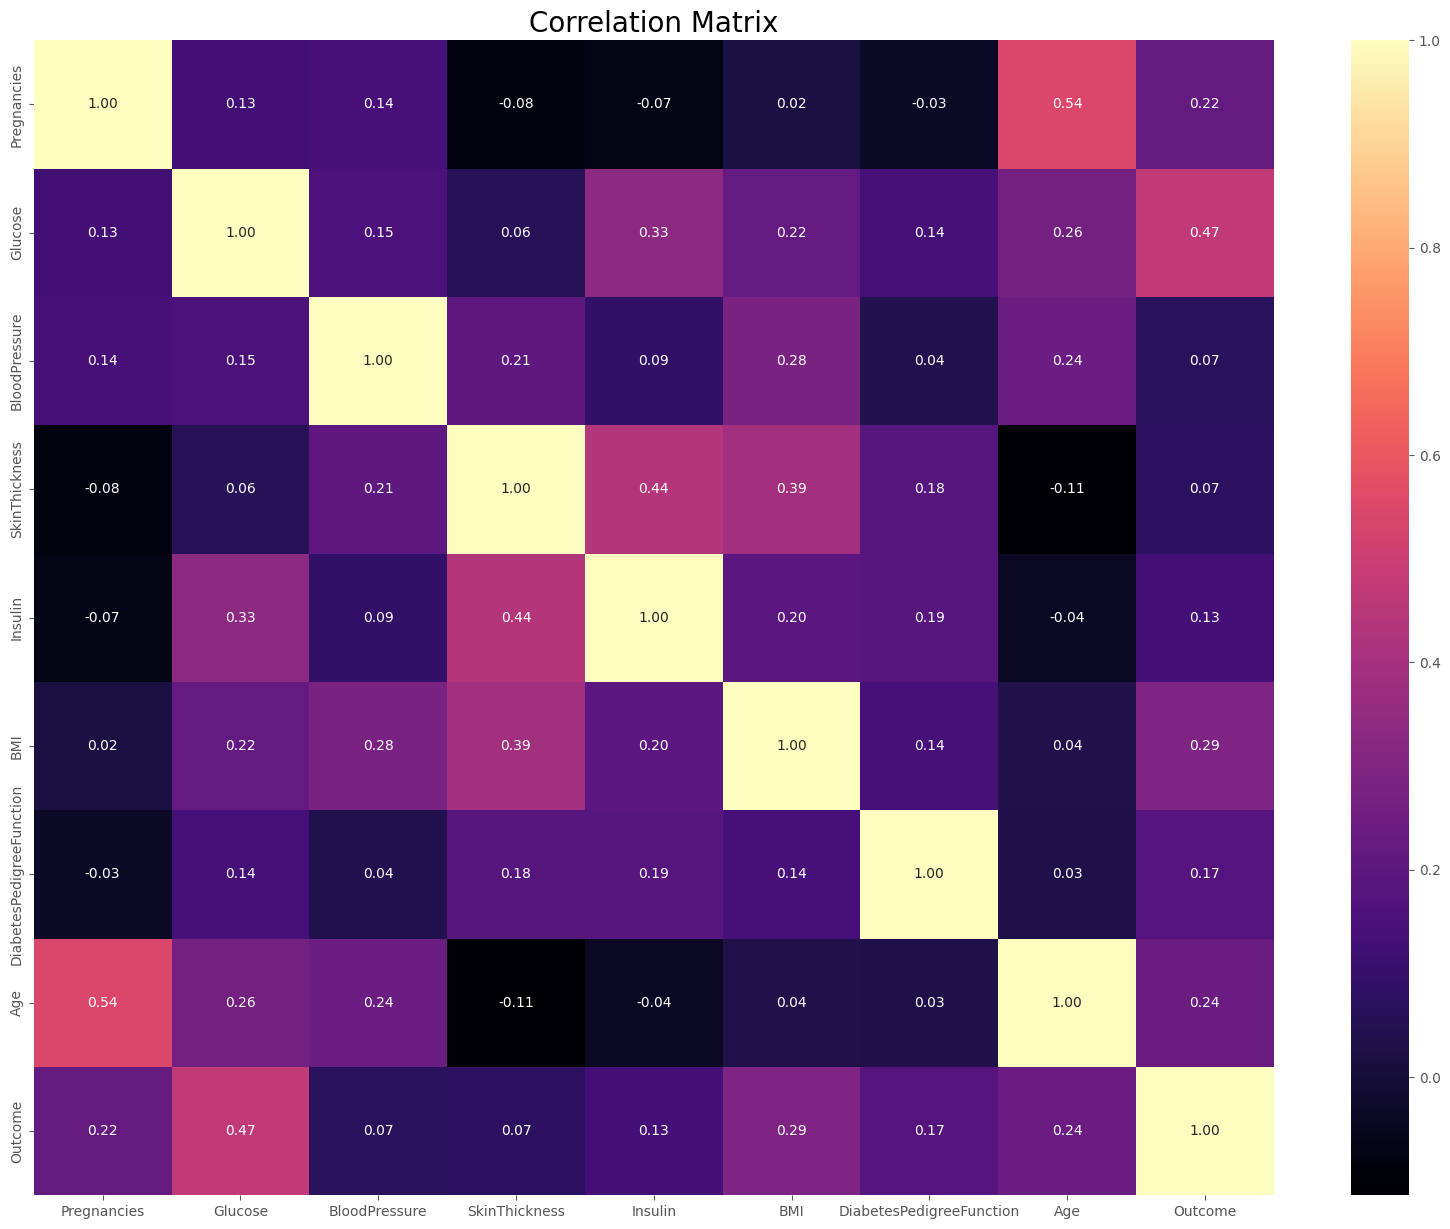

In [21]:
f , ax = plt.subplots(figsize=[20,15])

sns.heatmap(df.corr() , annot=True , fmt = '.2f' , ax=ax , cmap='magma')
ax.set_title("Correlation Matrix" , fontsize = 20)
plt.show()

In [1]:
# Here correlation is so bed because we get -ve value also to fit it we do data processing

# Chacking null value

In [29]:
df.isnull().sum()

Id                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [23]:
# It show no null value but here it show only blank value , it may be chance that some value set NAN it 

In [24]:
# Also concider as null value 
# Cheacking null value that consider as null 

In [25]:
# We convet NAN to 0 

In [26]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [30]:
df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']] = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age',]].replace(0 , np.NaN)

In [31]:
df.isnull().sum()

Id                            0
Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [32]:
df.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,2,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,3,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,4,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,5,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [33]:
def median_target(var):   
    temp = df[df[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

In [34]:
columns = df.columns
columns = columns.drop("Outcome")
for i in columns:
    median_target(i)
    df.loc[(df['Outcome'] == 0 ) & (df[i].isnull()), i] = median_target(i)[i][0]
    df.loc[(df['Outcome'] == 1 ) & (df[i].isnull()), i] = median_target(i)[i][1]

In [35]:
df.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,2,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,3,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,4,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,5,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [36]:
df.isnull().sum()

Id                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

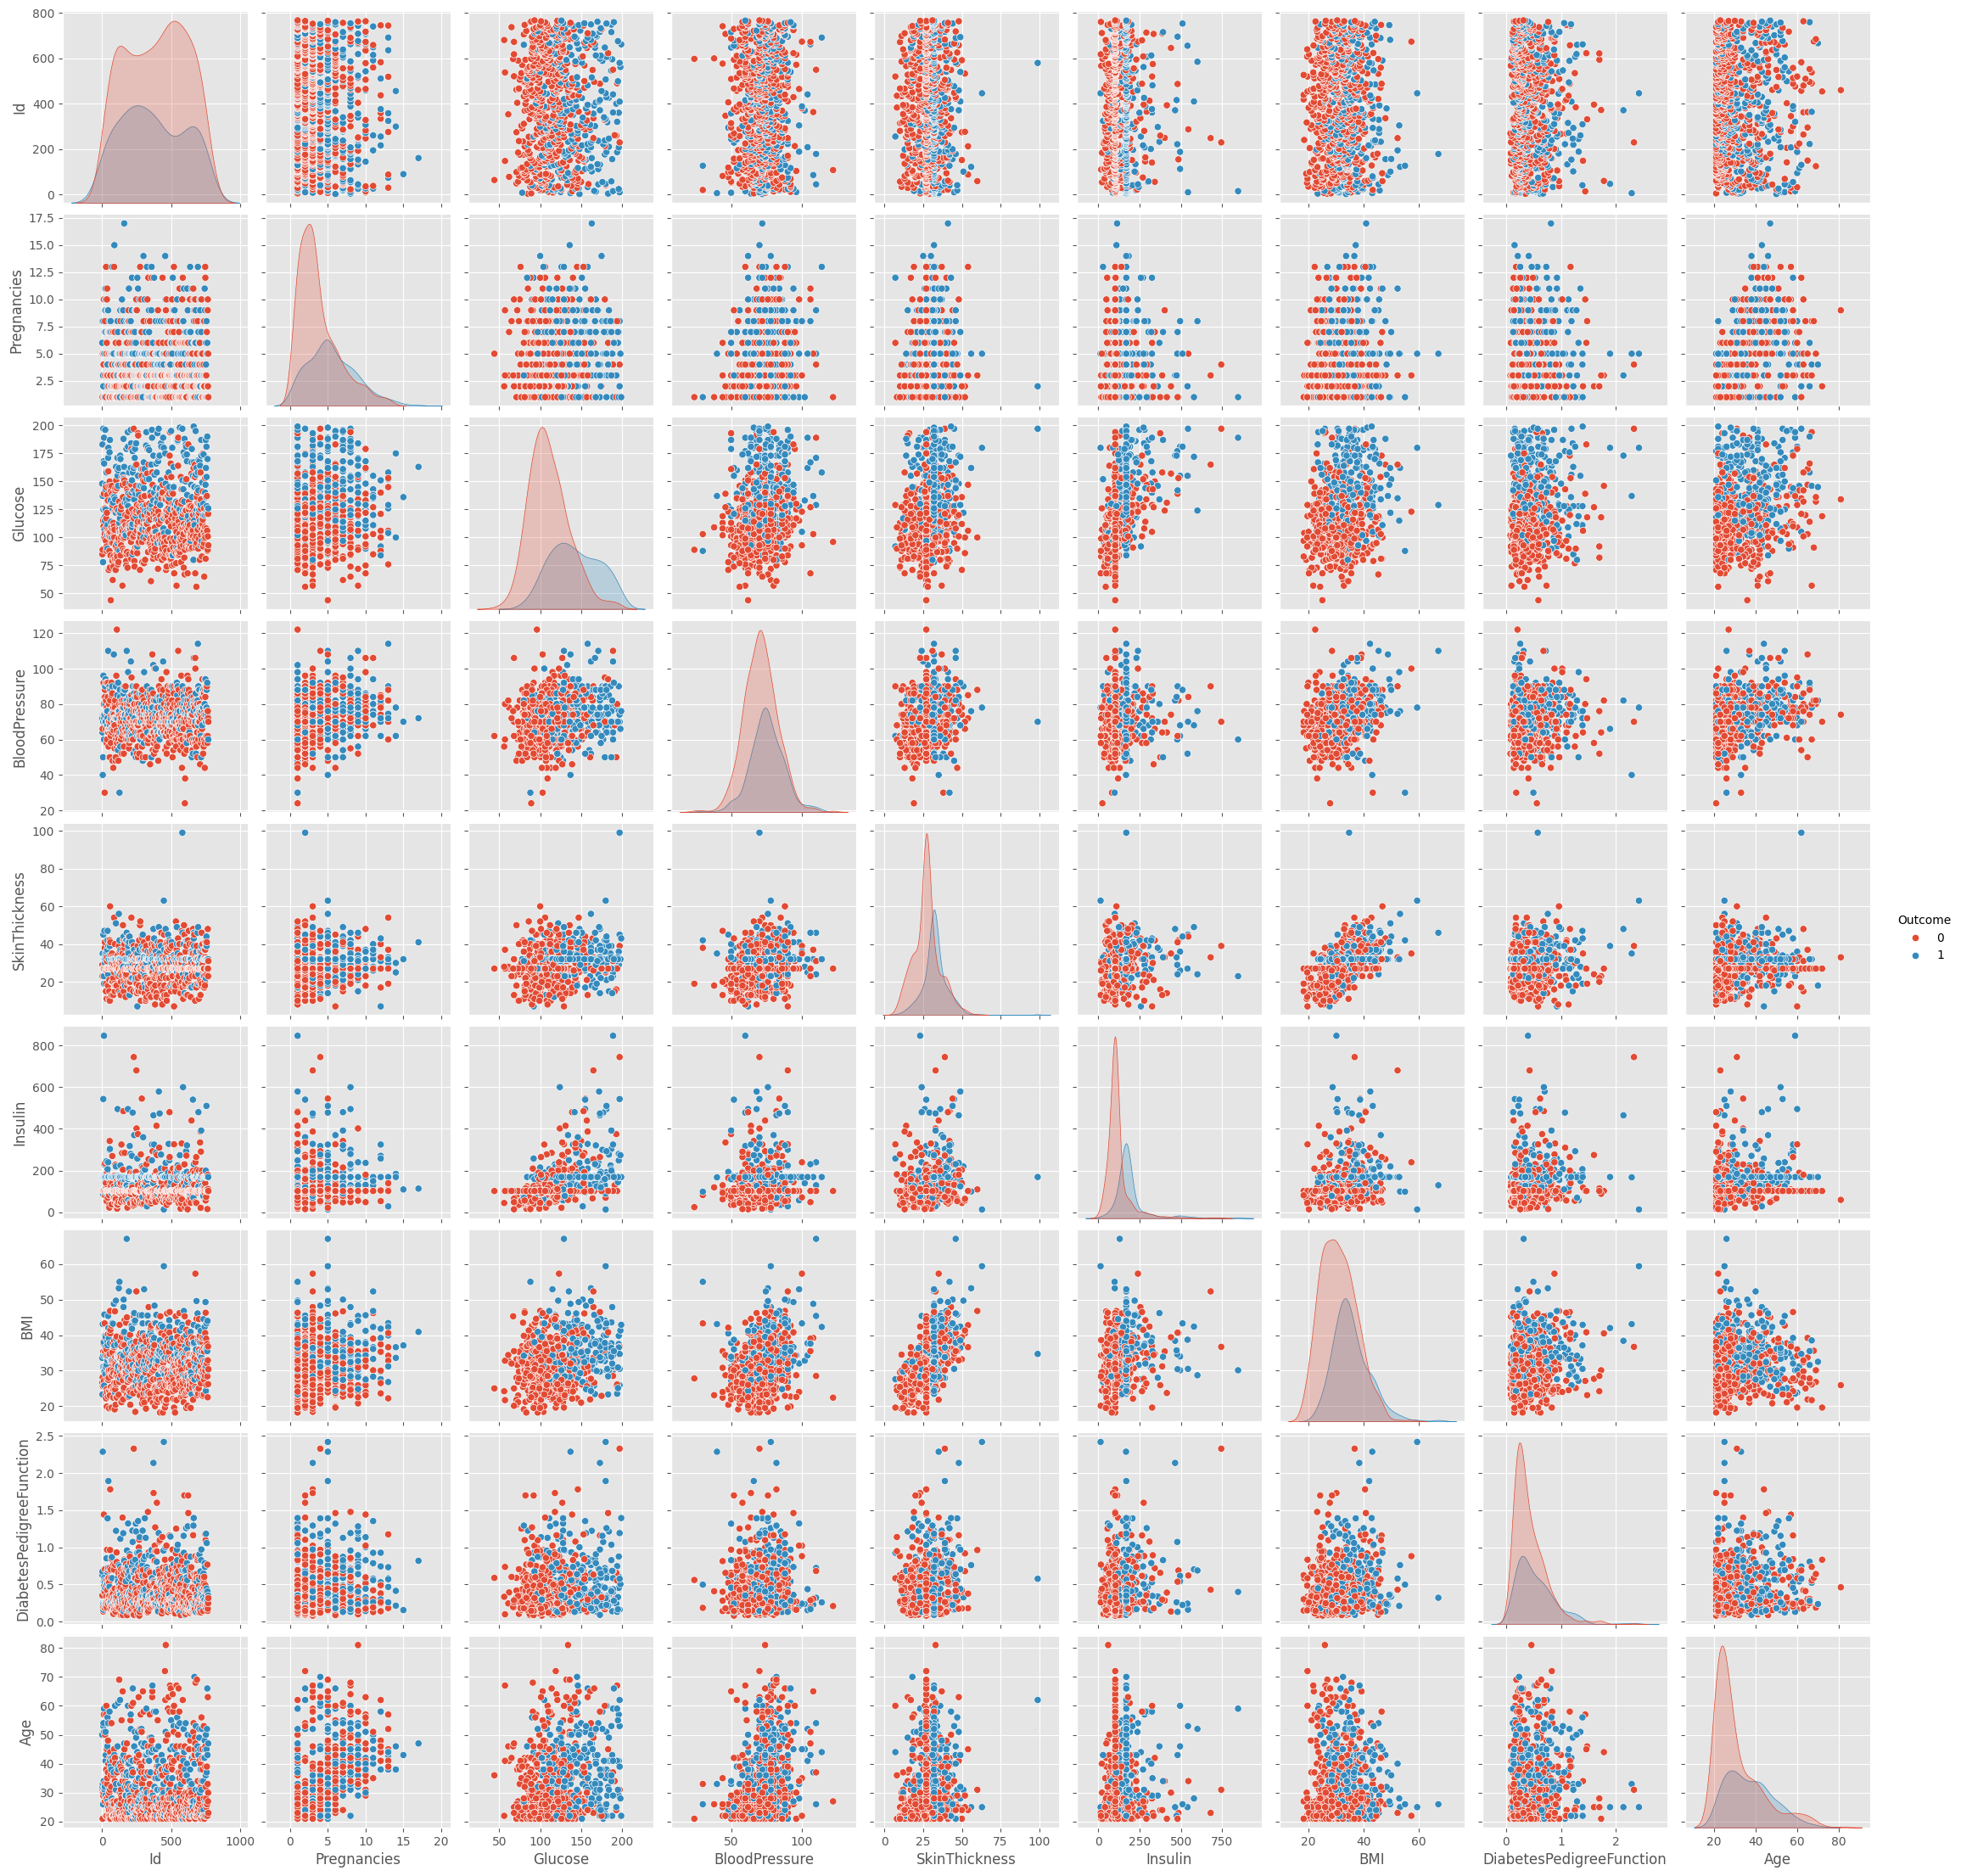

In [37]:
# pair plot
p = sns.pairplot(df, hue="Outcome")

In [38]:
# Outlier Detection
# IQR+Q1
# 50%
# 24.65->25%+50%
# 24.65->25%
for feature in df:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1-1.5*IQR
    upper = Q3+1.5*IQR
    if df[(df[feature]>upper)].any(axis=None):
        print(feature, "yes")
    else:
        print(feature, "no")

Id no
Pregnancies yes
Glucose no
BloodPressure yes
SkinThickness yes
Insulin yes
BMI yes
DiabetesPedigreeFunction yes
Age yes
Outcome no


<Axes: xlabel='Insulin'>

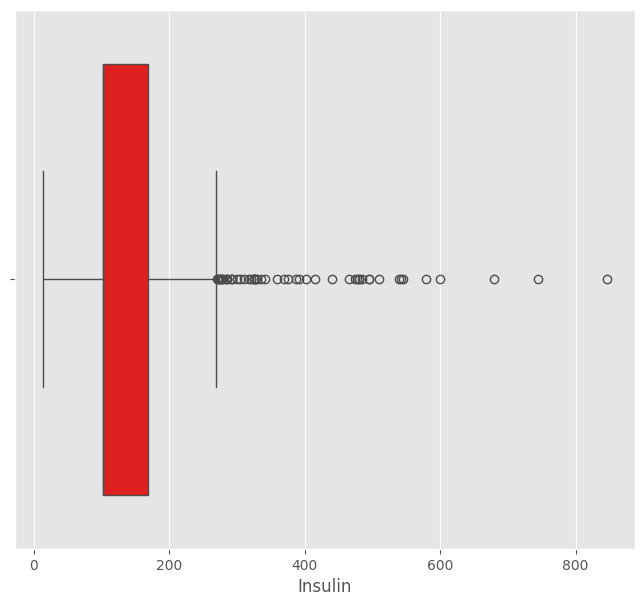

In [39]:
plt.figure(figsize=(8,7))
sns.boxplot(x= df["Insulin"], color="red")

In [40]:
Q1 = df.Insulin.quantile(0.25)
Q3 = df.Insulin.quantile(0.75)
IQR = Q3-Q1
lower = Q1-1.5*IQR
upper = Q3+1.5*IQR
df.loc[df['Insulin']>upper, "Insulin"] = upper

<Axes: xlabel='Insulin'>

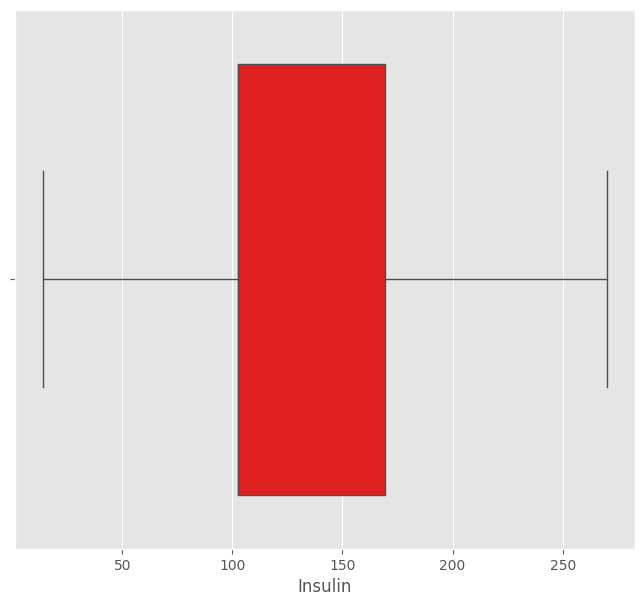

In [41]:
plt.figure(figsize=(8,7))
sns.boxplot(x= df["Insulin"], color="red")

In [42]:
# LOF
# local outlier factor
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors=10)
lof.fit_predict(df)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [43]:
df.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,2,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,3,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,4,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,5,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


<Axes: xlabel='Pregnancies'>

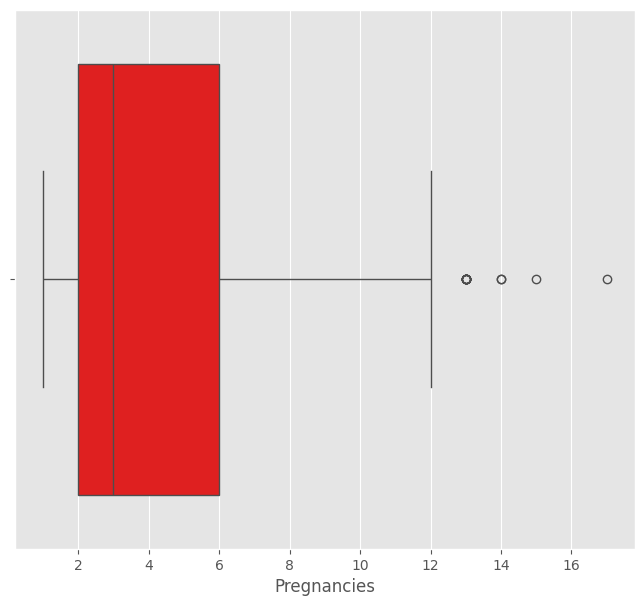

In [44]:
plt.figure(figsize=(8,7))
sns.boxplot(x= df["Pregnancies"], color="red")

In [45]:
df_scores = lof.negative_outlier_factor_
np.sort(df_scores)[0:20]

array([-2.2318487 , -1.95575091, -1.75344481, -1.75230418, -1.6526982 ,
       -1.64397975, -1.62092029, -1.61443895, -1.50816792, -1.49647422,
       -1.45367396, -1.45213778, -1.43046981, -1.42281348, -1.42153765,
       -1.41411646, -1.41158395, -1.40787006, -1.39734245, -1.38208981])

In [46]:
thresold = np.sort(df_scores)[7]

In [47]:
thresold

-1.6144389481443233

In [48]:
outlier = df_scores>thresold

In [49]:
df = df[outlier]

In [50]:
df.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,2,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,3,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,4,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,5,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [51]:
df.shape

(760, 10)

<Axes: xlabel='Pregnancies'>

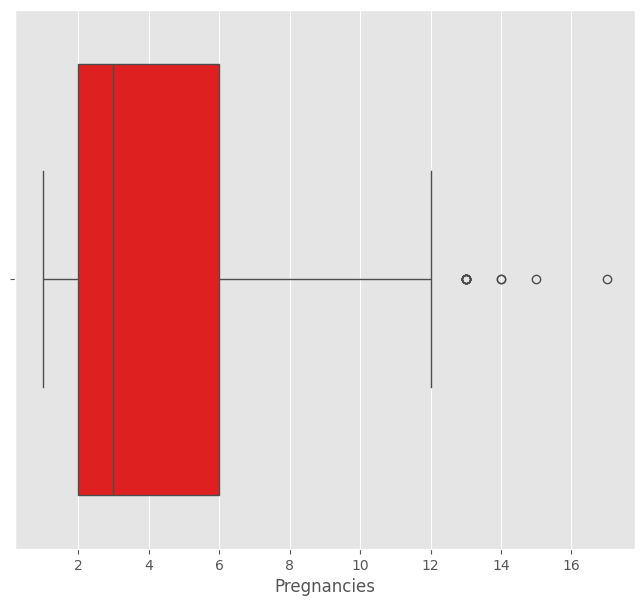

In [52]:
plt.figure(figsize=(8,7))
sns.boxplot(x= df["Pregnancies"], color="red")

In [53]:
# Feature Enginnering
NewBMI = pd.Series(["Underweight","Normal", "Overweight","Obesity 1", "Obesity 2", "Obesity 3"], dtype = "category")

In [54]:
NewBMI

0    Underweight
1         Normal
2     Overweight
3      Obesity 1
4      Obesity 2
5      Obesity 3
dtype: category
Categories (6, object): ['Normal', 'Obesity 1', 'Obesity 2', 'Obesity 3', 'Overweight', 'Underweight']

In [55]:
df['NewBMI'] = NewBMI
df.loc[df["BMI"]<18.5, "NewBMI"] = NewBMI[0]
df.loc[(df["BMI"]>18.5) & df["BMI"]<=24.9, "NewBMI"] = NewBMI[1]
df.loc[(df["BMI"]>24.9) & df["BMI"]<=29.9, "NewBMI"] = NewBMI[2]
df.loc[(df["BMI"]>29.9) & df["BMI"]<=34.9, "NewBMI"] = NewBMI[3]
df.loc[(df["BMI"]>34.9) & df["BMI"]<=39.9, "NewBMI"] = NewBMI[4]
df.loc[df["BMI"]>39.9, "NewBMI"] = NewBMI[5]

In [56]:
df.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI
0,1,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity 2
1,2,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Obesity 2
2,3,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Obesity 2
3,4,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Obesity 2
4,5,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity 3


In [57]:
# if insulin>=16 & insuline<=166->normal
def set_insuline(row):
    if row["Insulin"]>=16 and row["Insulin"]<=166:
        return "Normal"
    else:
        return "Abnormal"

In [58]:
df = df.assign(NewInsulinScore=df.apply(set_insuline, axis=1))

In [59]:
df.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulinScore
0,1,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity 2,Abnormal
1,2,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Obesity 2,Normal
2,3,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Obesity 2,Abnormal
3,4,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Obesity 2,Normal
4,5,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity 3,Abnormal


In [60]:
# Some intervals were determined according to the glucose variable and these were assigned categorical variables.
NewGlucose = pd.Series(["Low", "Normal", "Overweight", "Secret", "High"], dtype = "category")
df["NewGlucose"] = NewGlucose
df.loc[df["Glucose"] <= 70, "NewGlucose"] = NewGlucose[0]
df.loc[(df["Glucose"] > 70) & (df["Glucose"] <= 99), "NewGlucose"] = NewGlucose[1]
df.loc[(df["Glucose"] > 99) & (df["Glucose"] <= 126), "NewGlucose"] = NewGlucose[2]
df.loc[df["Glucose"] > 126 ,"NewGlucose"] = NewGlucose[3]

In [61]:
df.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulinScore,NewGlucose
0,1,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity 2,Abnormal,Secret
1,2,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Obesity 2,Normal,Normal
2,3,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Obesity 2,Abnormal,Secret
3,4,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Obesity 2,Normal,Normal
4,5,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity 3,Abnormal,Secret


In [64]:
df.columns

Index(['Id', 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome',
       'NewBMI', 'NewInsulinScore', 'NewGlucose'],
      dtype='object')

In [ ]:
categorical_df = df[['NewBMI_Obesity 1',
       'NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight',
       'NewBMI_Underweight', 'NewInsulinScore_Normal', 'NewGlucose_Low',
       'NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret']]

In [66]:
categorical_df.head()

NameError: name 'categorical_df' is not defined

In [67]:
y=df['Outcome']
X=df.drop(['Outcome','NewBMI_Obesity 1',
       'NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight',
       'NewBMI_Underweight', 'NewInsulinScore_Normal', 'NewGlucose_Low',
       'NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret'], axis=1)

KeyError: "['NewBMI_Obesity 1', 'NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight', 'NewBMI_Underweight', 'NewInsulinScore_Normal', 'NewGlucose_Low', 'NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret'] not found in axis"

In [68]:
cols = X.columns
index = X.index

NameError: name 'X' is not defined

In [69]:
X.head()


NameError: name 'X' is not defined

In [70]:
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(X)
X=transformer.transform(X)
X=pd.DataFrame(X, columns = cols, index = index)

NameError: name 'X' is not defined

In [71]:
X.head()

NameError: name 'X' is not defined

In [72]:
X = pd.concat([X, categorical_df], axis=1)

NameError: name 'X' is not defined

In [73]:
X.head()

NameError: name 'X' is not defined

In [74]:
X_train, X_test, y_train , y_test = train_test_split(X,y, test_size=0.2, random_state=0)

NameError: name 'X' is not defined

In [75]:
scaler =StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

NameError: name 'X_train' is not defined

In [76]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [77]:
y_pred = log_reg.predict(X_test)

NameError: name 'X_test' is not defined

In [78]:
accuracy_score(y_train, log_reg.predict(X_train))

NameError: name 'y_train' is not defined

In [79]:
log_reg_acc = accuracy_score(y_test, log_reg.predict(X_test))

NameError: name 'y_test' is not defined

In [80]:
confusion_matrix(y_test, y_pred)

NameError: name 'y_test' is not defined

In [81]:
print(classification_report(y_test, y_pred))

NameError: name 'y_test' is not defined

In [82]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(accuracy_score(y_train, knn.predict(X_train)))
knn_acc = accuracy_score(y_test, knn.predict(X_test))
print(accuracy_score(y_test, knn.predict(X_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

NameError: name 'X_train' is not defined

In [83]:
# SVM
svc = SVC(probability=True)
parameter = {
    "gamma":[0.0001, 0.001, 0.01, 0.1],
    'C': [0.01, 0.05,0.5, 0.01, 1, 10, 15, 20]
}
grid_search = GridSearchCV(svc, parameter)
grid_search.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [84]:
# best_parameter
grid_search.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [85]:
grid_search.best_score_

AttributeError: 'GridSearchCV' object has no attribute 'best_score_'

In [86]:
svc = SVC(C=10, gamma = 0.01, probability=True)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print(accuracy_score(y_train, svc.predict(X_train)))
svc_acc = accuracy_score(y_test, svc.predict(X_test))
print(accuracy_score(y_test, svc.predict(X_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

NameError: name 'X_train' is not defined

In [87]:
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)
y_pred = DT.predict(X_test)
print(accuracy_score(y_train, DT.predict(X_train)))

print(accuracy_score(y_test, DT.predict(X_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

NameError: name 'X_train' is not defined

In [88]:
# hyperparameter tuning of dt
grid_param = {
    'criterion':['gini','entropy'],
    'max_depth' :  [3,5,7,10],
    'splitter' : ['best','radom'],
    'min_samples_leaf':[1,2,3,5,7], 
    'min_samples_split':[1,2,3,5,7], 
    'max_features':['auto','sqrt','log2']
}
grid_search_dt = GridSearchCV(DT, grid_param, cv=50, n_jobs=-1, verbose = 1)
grid_search_dt.fit(X_train, y_train)


NameError: name 'X_train' is not defined

In [89]:
grid_search_dt.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [90]:

grid_search_dt.best_score_

AttributeError: 'GridSearchCV' object has no attribute 'best_score_'

In [91]:
DT = grid_search_dt.best_estimator_
y_pred = DT.predict(X_test)
print(accuracy_score(y_train, DT.predict(X_train)))
dt_acc = accuracy_score(y_test, DT.predict(X_test))
print(accuracy_score(y_test, DT.predict(X_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [92]:
rand_clf = RandomForestClassifier(criterion = 'entropy', max_depth = 15, max_features = 0.75, min_samples_leaf = 2, min_samples_split = 3, n_estimators = 130)
rand_clf.fit(X_train, y_train)

NameError: name 'RandomForestClassifier' is not defined

In [93]:

y_pred = rand_clf.predict(X_test)

NameError: name 'rand_clf' is not defined

In [94]:
y_pred = rand_clf.predict(X_test)
print(accuracy_score(y_train, rand_clf.predict(X_train)))
rand_acc = accuracy_score(y_test, rand_clf.predict(X_test))
print(accuracy_score(y_test, rand_clf.predict(X_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

NameError: name 'rand_clf' is not defined

In [95]:
gbc = GradientBoostingClassifier()

parameters = {
    'loss': ['deviance', 'exponential'],
    'learning_rate': [0.001, 0.1, 1, 10],
    'n_estimators': [100, 150, 180, 200]
}

grid_search_gbc = GridSearchCV(gbc, parameters, cv = 10, n_jobs = -1, verbose = 1)
grid_search_gbc.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [96]:
grid_search_gbc.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [97]:
grid_search_gbc.best_score_

AttributeError: 'GridSearchCV' object has no attribute 'best_score_'

In [98]:
gbc = GradientBoostingClassifier(learning_rate = 0.1, loss = 'exponential', n_estimators = 150)
gbc.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [99]:
gbc = grid_search_gbc.best_estimator_
y_pred = gbc.predict(X_test)
print(accuracy_score(y_train, gbc.predict(X_train)))
gbc_acc = accuracy_score(y_test, gbc.predict(X_test))
print(accuracy_score(y_test, gbc.predict(X_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [100]:
from xgboost import XGBClassifier 
xgb = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.01, max_depth = 10, n_estimators = 180)

xgb.fit(X_train, y_train)

ModuleNotFoundError: No module named 'xgboost'

In [101]:
y_pred = xgb.predict(X_test)
print(accuracy_score(y_train, xgb.predict(X_train)))
xgb_acc = accuracy_score(y_test, xgb.predict(X_test))
print(accuracy_score(y_test, xgb.predict(X_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

NameError: name 'xgb' is not defined

In [102]:
# Model Comparison
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'SVM', 'Decision Tree Classifier', 'Random Forest Classifier', 'Gradient Boosting Classifier', 'XgBoost'],
    'Score': [100*round(log_reg_acc,4), 100*round(knn_acc,4), 100*round(svc_acc,4), 100*round(dt_acc,4), 100*round(rand_acc,4), 
              100*round(gbc_acc,4), 100*round(xgb_acc,4)]
})
models.sort_values(by = 'Score', ascending = False)


NameError: name 'log_reg_acc' is not defined

In [103]:
import pickle
model = gbc_acc
pickle.dump(model, open("diabetes.pkl",'wb'))

NameError: name 'gbc_acc' is not defined

In [104]:
from sklearn import metrics
plt.figure(figsize=(8,5))
models = [
{
    'label': 'LR',
    'model': log_reg,
},
{
    'label': 'DT',
    'model': DT,
},
{
    'label': 'SVM',
    'model': svc,
},
{
    'label': 'KNN',
    'model': knn,
},
{
    'label': 'XGBoost',
    'model': xgb,
},
{
    'label': 'RF',
    'model': rand_clf,
},
{
    'label': 'GBDT',
    'model': gbc,
}
]
for m in models:
    model = m['model'] 
    model.fit(X_train, y_train) 
    y_pred=model.predict(X_test) 
    fpr1, tpr1, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
    plt.plot(fpr1, tpr1, label='%s - ROC (area = %0.2f)' % (m['label'], auc))

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (False Positive Rate)', fontsize=12)
plt.ylabel('Sensitivity (True Positive Rate)', fontsize=12)
plt.title('ROC - Diabetes Prediction', fontsize=12)
plt.legend(loc="lower right", fontsize=12)
plt.savefig("roc_diabetes.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()

NameError: name 'xgb' is not defined

<Figure size 800x500 with 0 Axes>

In [105]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
models = [
{
    'label': 'LR',
    'model': log_reg,
},
{
    'label': 'DT',
    'model': DT,
},
{
    'label': 'SVM',
    'model': svc,
},
{
    'label': 'KNN',
    'model': knn,
},
{
    'label': 'XGBoost',
    'model': xgb,
},
{
    'label': 'RF',
    'model': rand_clf,
},
{
    'label': 'GBDT',
    'model': gbc,
}
]

means_roc = []
means_accuracy = [100*round(log_reg_acc,4), 100*round(dt_acc,4), 100*round(svc_acc,4), 100*round(knn_acc,4), 100*round(xgb_acc,4), 
                  100*round(rand_acc,4), 100*round(gbc_acc,4)]

for m in models:
    model = m['model'] 
    model.fit(X_train, y_train) 
    y_pred=model.predict(X_test) 
    fpr1, tpr1, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
    auc = 100*round(auc,4)
    means_roc.append(auc)

print(means_accuracy)
print(means_roc)

# data to plot
n_groups = 7
means_accuracy = tuple(means_accuracy)
means_roc = tuple(means_roc)

# create plot
fig, ax = plt.subplots(figsize=(8,5))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, means_accuracy, bar_width,
alpha=opacity,
color='mediumpurple',
label='Accuracy (%)')

rects2 = plt.bar(index + bar_width, means_roc, bar_width,
alpha=opacity,
color='rebeccapurple',
label='ROC (%)')

plt.xlim([-1, 8])
plt.ylim([60, 95])

plt.title('Performance Evaluation - Diabetes Prediction', fontsize=12)
plt.xticks(index, ('   LR', '   DT', '   SVM', '   KNN', 'XGBoost' , '   RF', '   GBDT'), rotation=40, ha='center', fontsize=12)
plt.legend(loc="upper right", fontsize=10)
plt.savefig("PE_diabetes.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()

NameError: name 'xgb' is not defined